In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',100)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.shape

(8523, 12)

In [5]:
train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
train.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### handling missing values


In [10]:
trainNullper = train.apply(lambda x : np.round(100*x.isnull().sum()/train.shape[0],2))

In [11]:
trainNullper
#trainNullDF

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

In [12]:
train.Outlet_Size.mode()

0    Medium
dtype: object

In [13]:
train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0],inplace=True)

In [14]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
train.Item_Weight.nunique()

415

In [16]:
train['Item_Weight'].median()

12.6

In [17]:
#random_sample = train["Item_Weight"].dropna().sample(train["Item_Weight"].isnull().sum(),random_state=0)
#random_sample.index = train[train["Item_Weight"].isnull()].index
#train.loc[train["Item_Weight"].isnull(),"Item_Weight_r"] = random_sample

In [18]:
train["Item_Weight"].fillna(train["Item_Weight"].median(),inplace=True)

In [19]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
cols = train.columns

In [21]:
cols

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

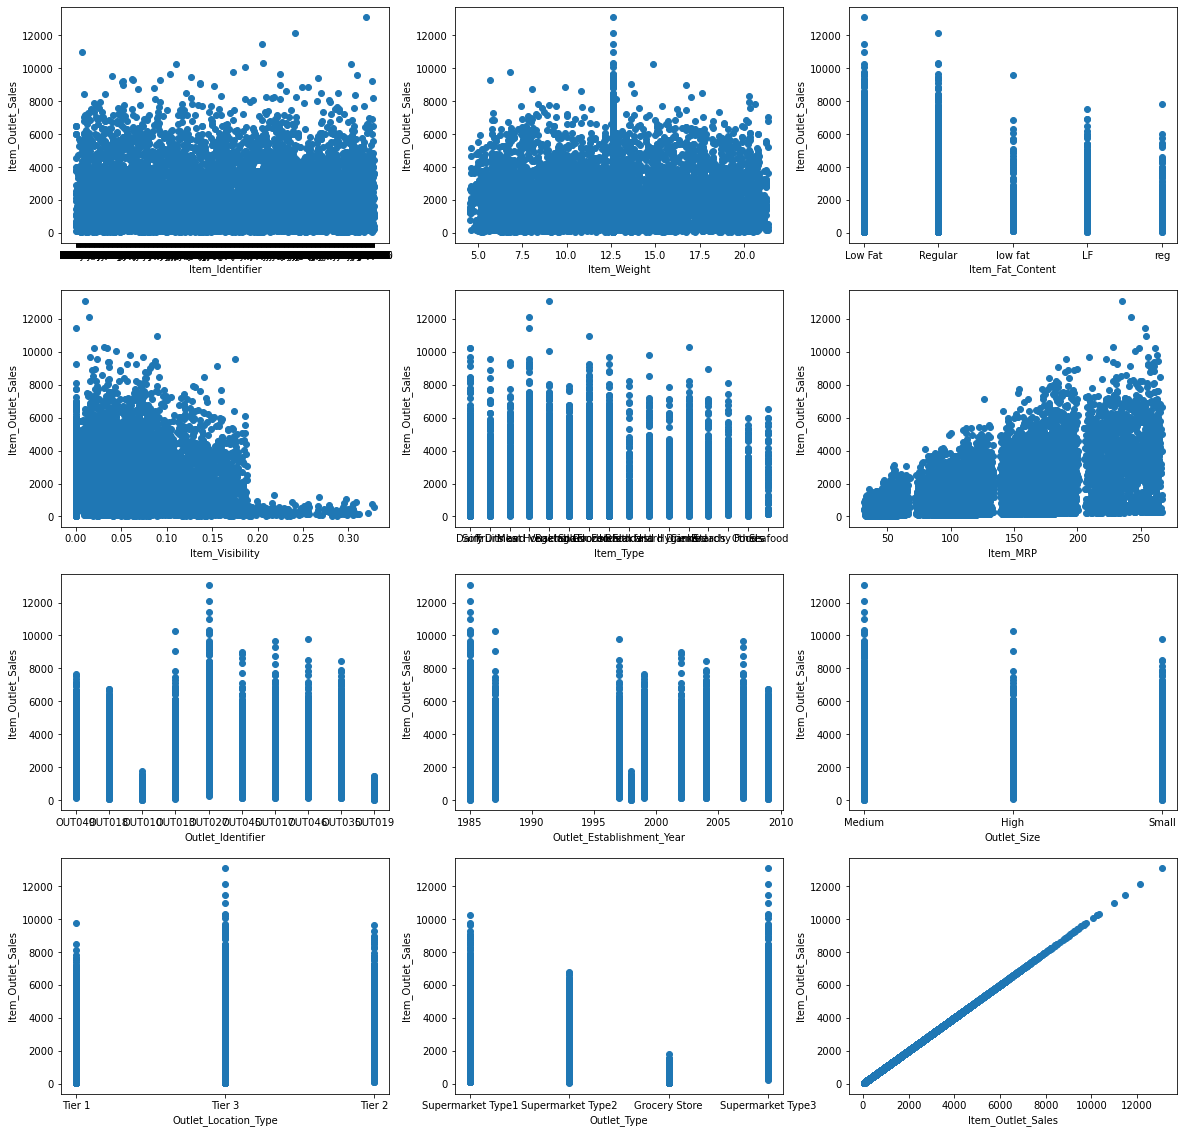

In [22]:
j=0 
plt.figure(figsize=(20,20))
for column in cols:
    plt.subplot(4,3,j+1)
    plt.scatter(train[column],train['Item_Outlet_Sales'])
    plt.xlabel(column)
    plt.ylabel("Item_Outlet_Sales")
    j+=1

In [23]:
numericalColumns = train.select_dtypes(include=np.number).columns
numericalColumns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [24]:
numericalColumns.shape

(5,)

In [25]:
objectColumns = train.select_dtypes(include=np.object).columns
objectColumns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

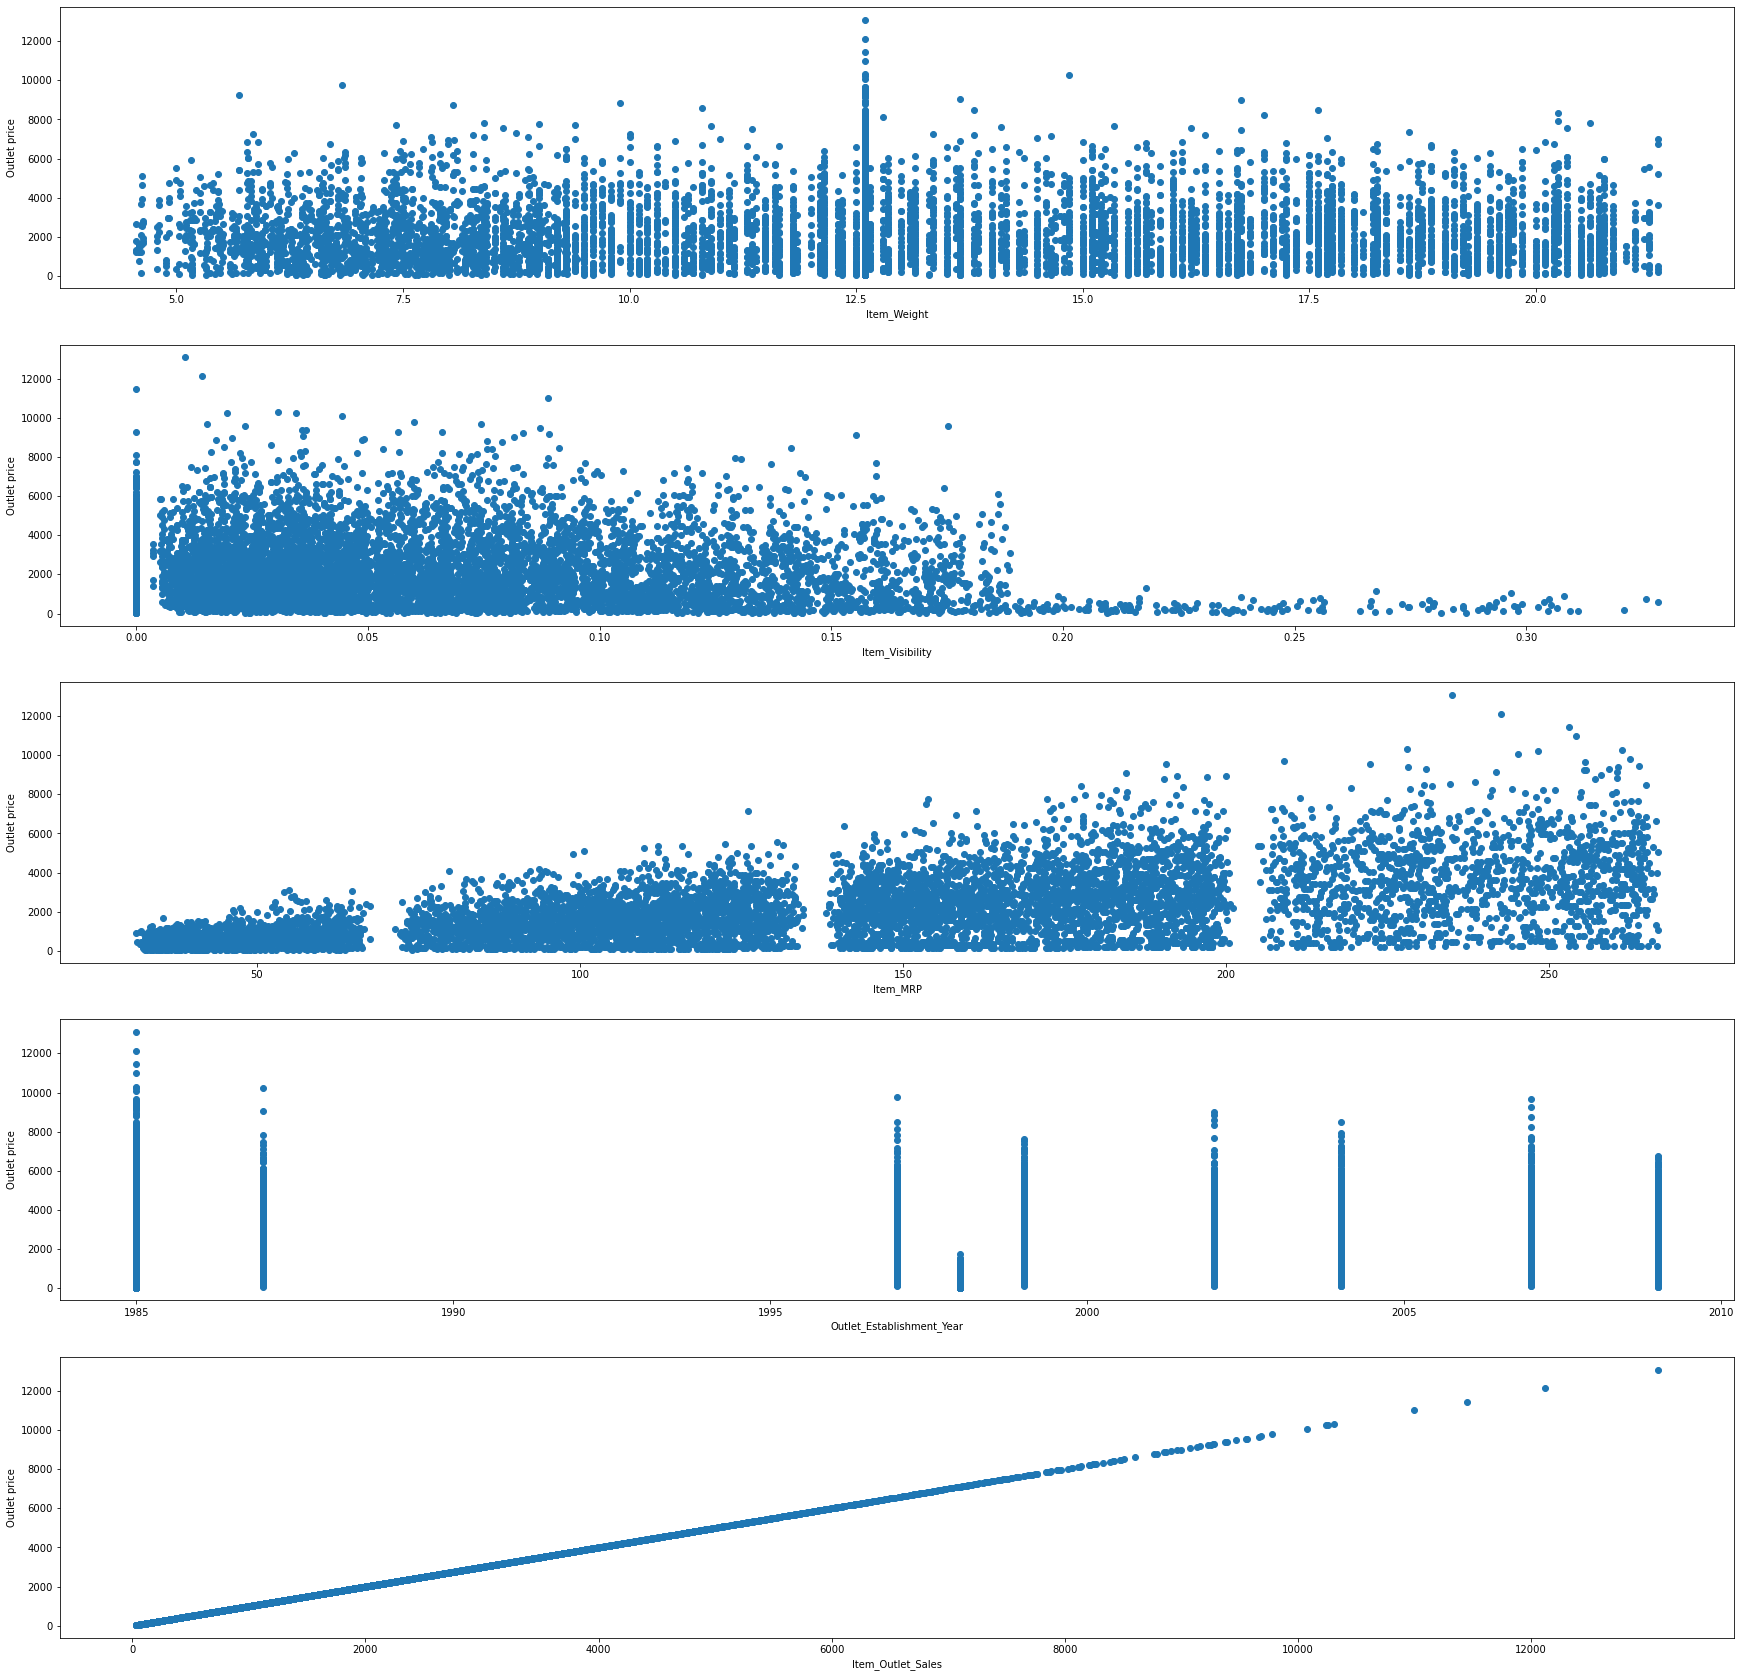

In [26]:
j = 0 
plt.figure(figsize=(30,30))
for column in numericalColumns:
    plt.subplot(5,1,j+1)
    plt.scatter(train[column],train["Item_Outlet_Sales"])
    plt.xlabel(column)
    plt.ylabel("Outlet price")
    j+=1

In [27]:
descreteCol = []
continuousCol = []
for cols in numericalColumns:
    if train[cols].nunique() > 20:
        continuousCol.append(cols)
    else:
        descreteCol.append(cols)
    

In [28]:
descreteCol

['Outlet_Establishment_Year']

In [29]:
continuousCol

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

In [30]:
len(objectColumns)

7

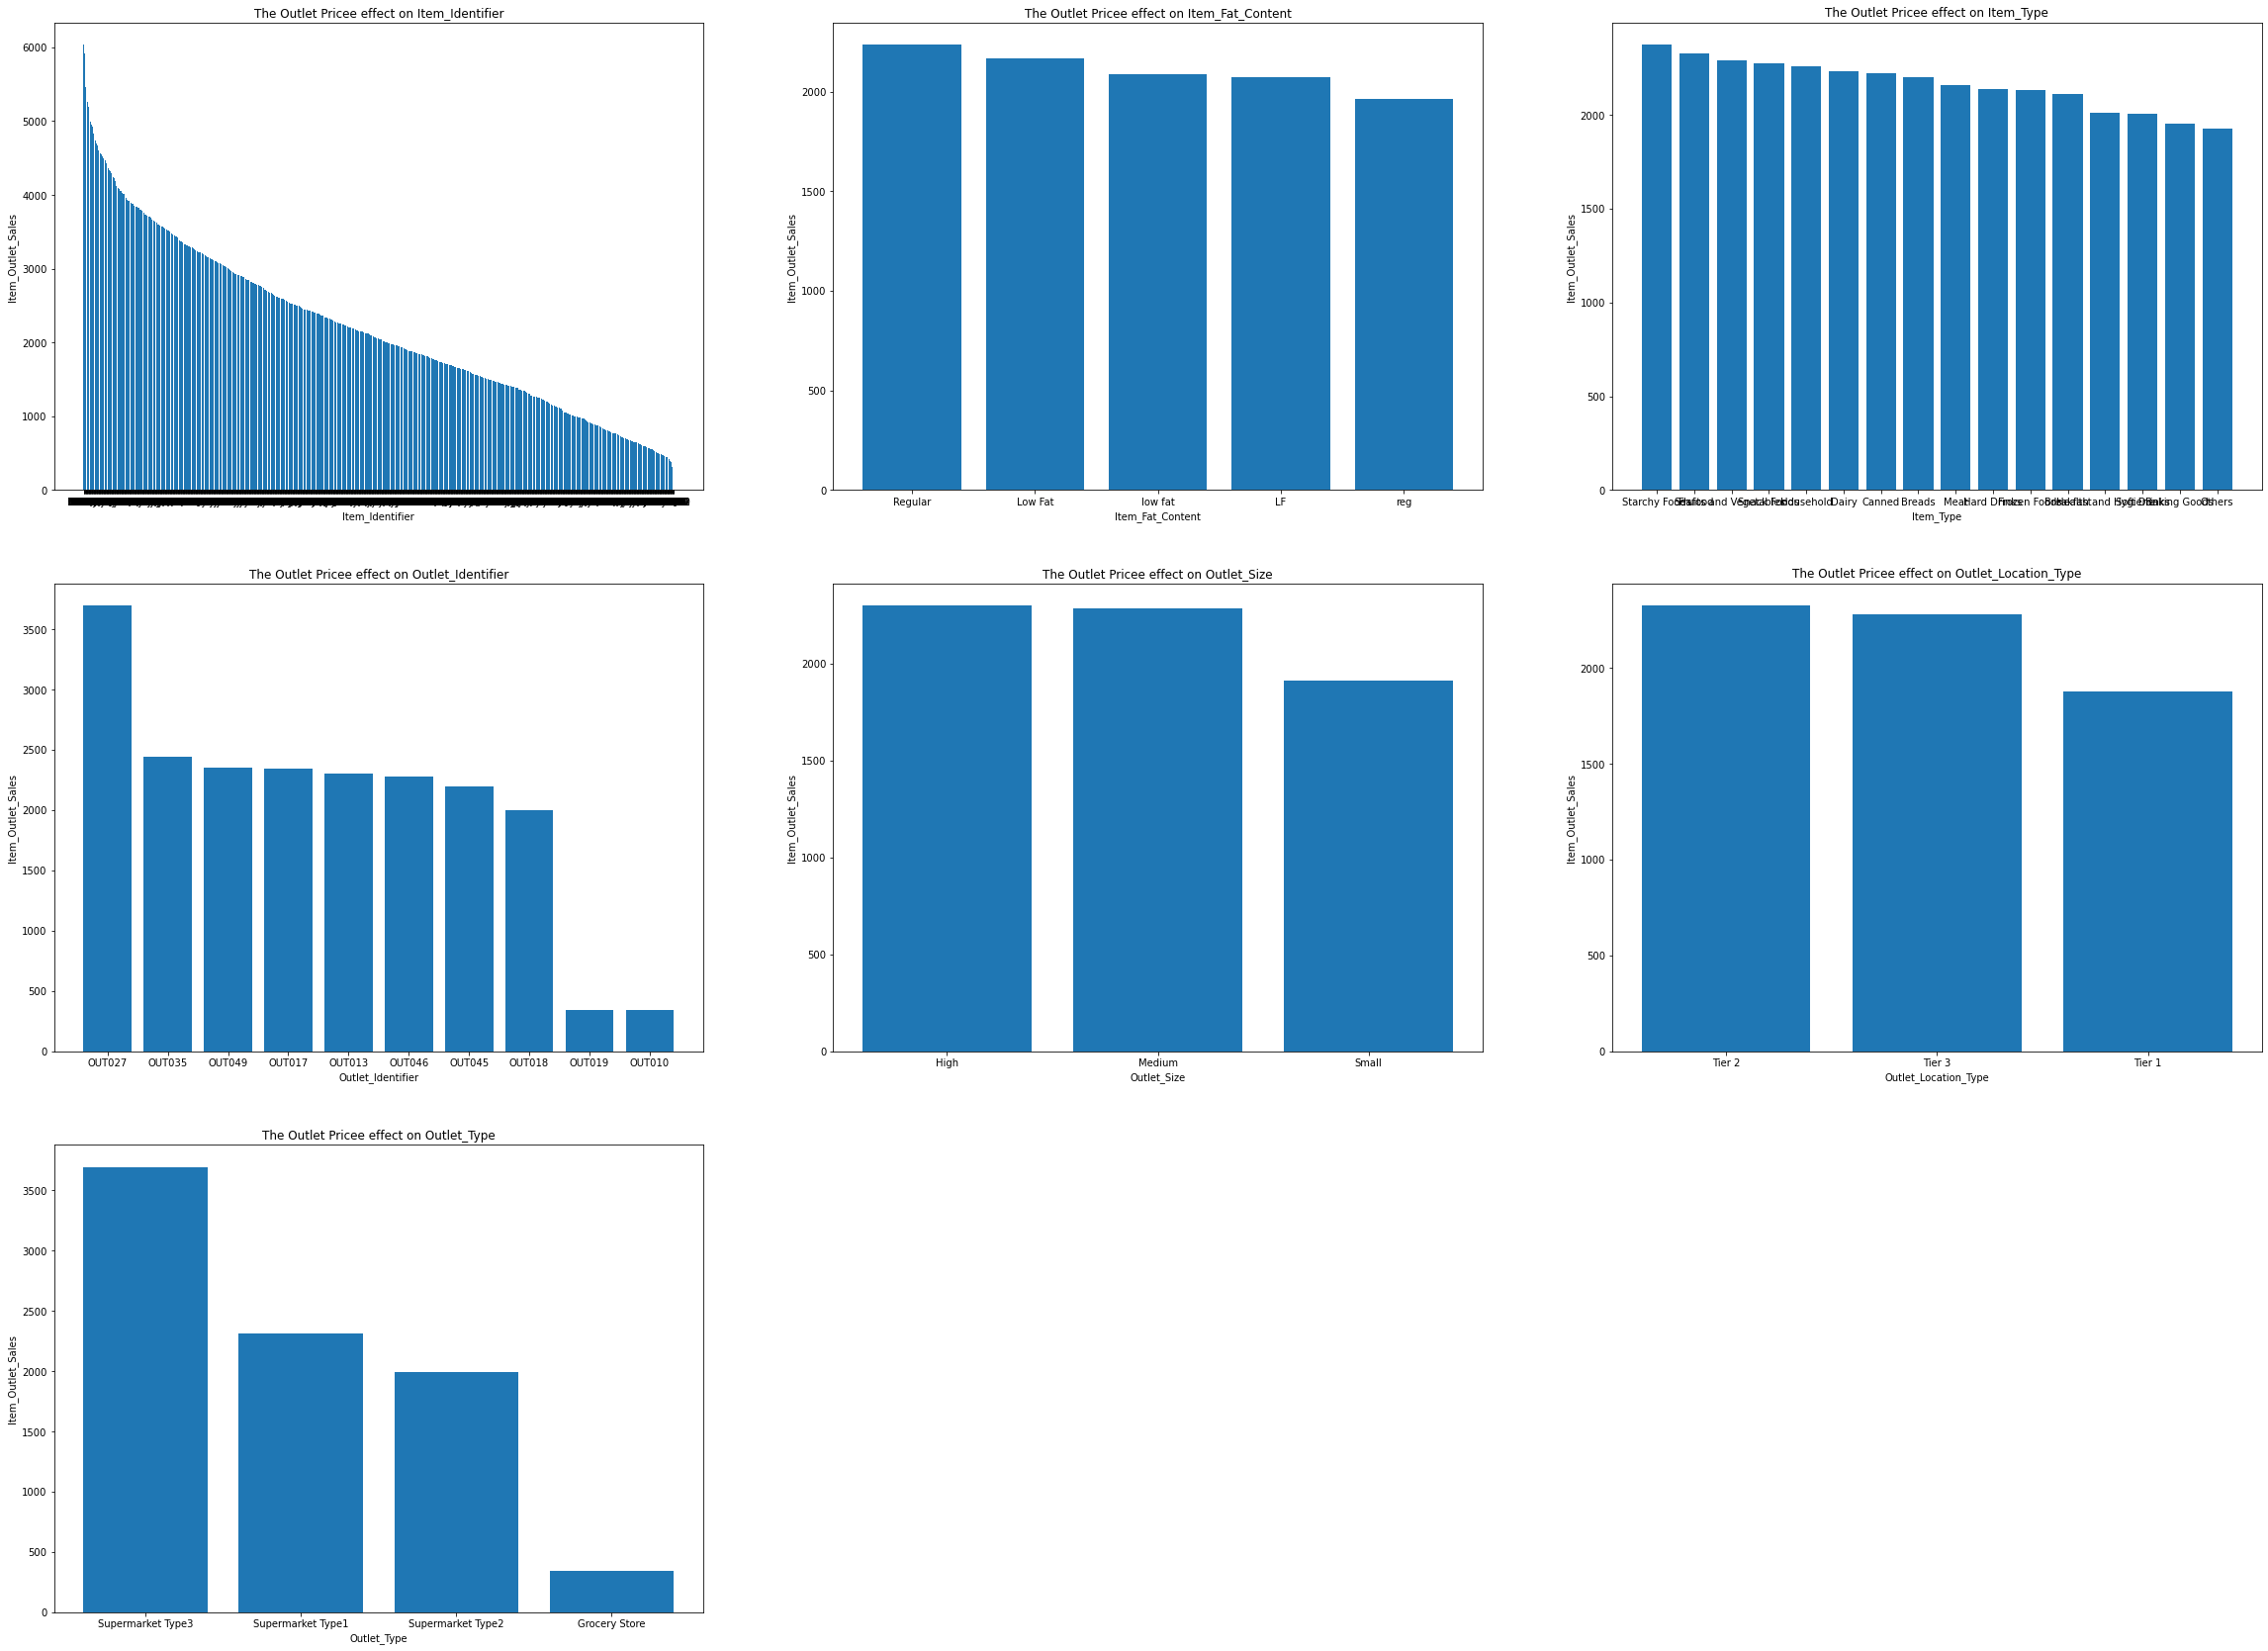

In [31]:
j = 0
plt.figure(figsize=(40,40))
for cols in objectColumns:
    plt.subplot(4,3,j+1)
    observational = train.groupby(cols)['Item_Outlet_Sales'].mean()
    observationalvalDF = pd.DataFrame(observational).sort_values(by = 'Item_Outlet_Sales',ascending=False)
    observationalvalDF.reset_index(inplace=True)
    plt.bar(observationalvalDF[cols],observationalvalDF['Item_Outlet_Sales'])
    plt.title(f"The Outlet Pricee effect on {cols}")
    plt.xlabel(cols)
    plt.ylabel("Item_Outlet_Sales")
    j+=1

Text(0, 0.5, 'Item_Outlet_Sales')

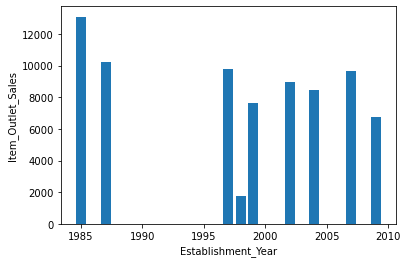

In [32]:
plt.bar(train['Outlet_Establishment_Year'],train['Item_Outlet_Sales'])
plt.xlabel('Establishment_Year')
plt.ylabel('Item_Outlet_Sales')

In [33]:
for column in continuousCol :
    upper_lim=train[column].mean()+train[column].std() *3
    lower_lim=train[column].mean()-train[column].std() *3

    train.loc[(train[column] > upper_lim),column] = upper_lim
    train.loc[(train[column] < lower_lim),column] = lower_lim

In [34]:
upper_lim

7300.787760776532

In [35]:
lower_lim

-2938.209933626459

In [36]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.065655,140.992782,1997.831867,2169.064715
std,4.22724,0.049843,62.275067,8.371760,1661.273963
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.220925,266.888400,2009.000000,7300.787761


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [38]:
train[(train['Item_Visibility'] <= upper_lim) & (train['Item_Visibility'] >= lower_lim) ]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [39]:
trainObjectDf = train[objectColumns]
trainObjectDf

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [40]:
from collections import defaultdict
defaultEncoder = defaultdict(LabelEncoder)
# variable encoding
fittraObjectDf = trainObjectDf.apply(lambda x : defaultEncoder[x.name].fit_transform(x))

In [41]:
fittraObjectDf

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,1,4,9,1,0,1
1,8,2,14,3,1,2,2
2,662,1,10,9,1,0,1
3,1121,2,6,0,1,2,0
4,1297,1,9,1,0,2,1
...,...,...,...,...,...,...,...
8518,370,1,13,1,0,2,1
8519,897,2,0,7,1,1,1
8520,1357,1,8,6,2,1,1
8521,681,2,13,3,1,2,2


In [42]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [43]:
fittraObjectDf.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,1,4,9,1,0,1
1,8,2,14,3,1,2,2
2,662,1,10,9,1,0,1
3,1121,2,6,0,1,2,0
4,1297,1,9,1,0,2,1


In [44]:
train.drop(train[objectColumns],axis=1,inplace=True)

In [45]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [46]:
updated_train = pd.concat([train,fittraObjectDf],axis=1)

In [47]:
updated_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0.016047,249.8092,1999,3735.1380,156,1,4,9,1,0,1
1,5.92,0.019278,48.2692,2009,443.4228,8,2,14,3,1,2,2
2,17.50,0.016760,141.6180,1999,2097.2700,662,1,10,9,1,0,1
3,19.20,0.000000,182.0950,1998,732.3800,1121,2,6,0,1,2,0
4,8.93,0.000000,53.8614,1987,994.7052,1297,1,9,1,0,2,1


In [48]:
corr_DF = updated_train.corr()

In [49]:
abs(corr_DF['Item_Outlet_Sales'])

Item_Weight                  0.010340
Item_Visibility              0.124278
Item_MRP                     0.572033
Outlet_Establishment_Year    0.042671
Item_Outlet_Sales            1.000000
Item_Identifier              0.002839
Item_Fat_Content             0.009672
Item_Type                    0.017307
Outlet_Identifier            0.166349
Outlet_Size                  0.086717
Outlet_Location_Type         0.086254
Outlet_Type                  0.400809
Name: Item_Outlet_Sales, dtype: float64

In [50]:
corr_cols = abs(corr_DF['Item_Outlet_Sales']).sort_values(ascending=False)

In [51]:
corr_cols

Item_Outlet_Sales            1.000000
Item_MRP                     0.572033
Outlet_Type                  0.400809
Outlet_Identifier            0.166349
Item_Visibility              0.124278
Outlet_Size                  0.086717
Outlet_Location_Type         0.086254
Outlet_Establishment_Year    0.042671
Item_Type                    0.017307
Item_Weight                  0.010340
Item_Fat_Content             0.009672
Item_Identifier              0.002839
Name: Item_Outlet_Sales, dtype: float64

In [52]:
finalColumns = corr_cols[corr_cols > 0.4].index

In [53]:
finalColumns

Index(['Item_Outlet_Sales', 'Item_MRP', 'Outlet_Type'], dtype='object')

In [54]:
finalDF = updated_train[finalColumns]
finalDF.head()

,Item_Outlet_Sales,Item_MRP,Outlet_Type
0,3735.1380,249.8092,1
1,443.4228,48.2692,2
2,2097.2700,141.6180,1
3,732.3800,182.0950,0
4,994.7052,53.8614,1


In [55]:
y = finalDF["Item_Outlet_Sales"]

In [60]:
X = finalDF.drop(["Item_Outlet_Sales"],axis=1)

In [61]:
X.head()

,Item_MRP,Outlet_Type
0,249.8092,1
1,48.2692,2
2,141.6180,1
3,182.0950,0
4,53.8614,1


In [58]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)




In [63]:
X_train.head()

,Item_MRP,Outlet_Type
3288,39.5480,3
2206,191.3846,1
170,164.8210,1
6526,237.3564,3
135,116.0492,1


In [65]:
sc_X = StandardScaler()
X_train =pd.DataFrame(sc_X.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(sc_X.transform(X_test),columns=X_test.columns)

sc_y = StandardScaler()
y_train = pd.DataFrame(sc_y.fit_transform(np.array(y_train).reshape(-1,1)))
y_test = pd.DataFrame(sc_y.transform(np.array([y_test]).reshape(-1,1)))

In [66]:
import scipy.stats as stat
import pylab

In [68]:
def plot_data(X_train,feature):
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    X_train[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(X_train[feature],dist='norm',plot = pylab)
    plt.show()

In [74]:
for i in X_train.columns:
    X_train[i],parameters = stat.boxcox(X_train[i])
    plot_data(X_train,i)

SyntaxError: cannot assign to function call (Temp/ipykernel_8396/1193591392.py, line 2)

In [71]:
X_train.head()

,Item_MRP,Outlet_Type
0,-1.632721,2.237916
1,0.789177,-0.263258
2,0.365470,-0.263258
3,1.522459,2.237916
4,-0.412474,-0.263258
